In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
import ast
import numpy as np

In [2]:
def atom_df(atom):
    dict_list = []
    for model in SMI_dict:
        for species in SMI_dict[model]:
            if species == atom:
                for hybridization in SMI_dict[model][species]:
                    for i in range(len(SMI_dict[model][species][hybridization]['E'])):
                        data_dict = {
                            'model': model,
                            'species': species,
                            'hybridization': hybridization,
                            'E': SMI_dict[model][species][hybridization]['E'][i],
                            'SMILES': SMI_dict[model][species][hybridization]['SMILES'][i], 
                            'Neighbors': SMI_dict[model][species][hybridization]['Neighbors'][i]
                        }
                        dict_list.append(data_dict)
    df = pd.DataFrame(dict_list)
    return df

def avg_atom_df(atom, models=8):
    avg_dict_list = []
    for model in SMI_dict:
        for species in SMI_dict[model]:
            if species == atom:
                for hybridization in SMI_dict[model][species]:
                    for i in range(len(SMI_dict[model][species][hybridization]['E'])):
                        for m in range(models):
                            data_dict = {
                                    'model': -1,
                                    'species': species,
                                    'hybridization': hybridization,
                                    'E': SMI_dict[m][species][hybridization]['E'][i],
                                    'SMILES': SMI_dict[m][species][hybridization]['SMILES'][i]
                                }
                            avg_dict_list.append(data_dict)
    avg_df = pd.DataFrame(avg_dict_list)
    return avg_df

# Importing data

In [3]:
### Edit
sdf_path = 'sdfs/ANI-1E/l3_ani2xrepulsion_ani1e_unopt_permodel.sdf'

In [4]:
frame = PandasTools.LoadSDF(sdf_path,smilesName='SMILES',molColName='Molecule', includeFingerprints=False)

In [5]:
averages = []
for x, cell in enumerate(frame['atomic_energies']):
    cell = ast.literal_eval(cell)
    mods = []
    for l in range(len(cell[0][0])):
        nums = []
        for j in range(len(cell)):
            nums.append(cell[j][0][l])
        mods.append(nums)
    avglst = [sum(np.array(k))/len(cell) for k in mods]
    averages.append(avglst)
frame['average_atomic_energies']=averages

,energy,atomic_energies,symbols,hybridization,valence,aromatic,neighbors,layer3,ID,SMILES,Molecule,average_atomic_energies
6,"[[-217276.9375], [-217691.8125], [-217601.6718...","[[[-304.7176818847656, -23710.552734375, -304....","['H', 'C', 'H', 'H', 'C', 'H', 'H', 'O', 'C', ...","['S', 'SP3', 'S', 'S', 'SP3', 'S', 'S', 'SP3',...","[1, 4, 1, 1, 4, 1, 1, 2, 4, 1, 1, 4, 4, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[['C'], ['H', 'H', 'H', 'C'], ['C'], ['C'], ['...","[[-0.0001520974765298888, -0.00613524718210101...","cell tensor([0., 0., 0.]) tensor([0., 0., 0.])...",CCOCC1(C)CC1,,"[-311.52038138253346, -23720.943917410714, -31..."
7,"[[-246617.953125], [-246939.75], [-246828.2968...","[[[-274.96209716796875, -34210.8203125, -23696...","['H', 'N', 'C', 'H', 'N', 'C', 'H', 'N', 'O', ...","['S', 'SP2', 'SP2', 'S', 'SP2', 'SP2', 'S', 'S...","[1, 3, 4, 1, 3, 4, 1, 3, 2, 4, 1, 1, 4, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[['N'], ['C', 'H'], ['N', 'H', 'N'], ['C'], ['...","[[0.0005113866645842791, -0.011375360190868378...","cell tensor([0., 0., 0.]) tensor([0., 0., 0.])...",N=CN1C=NOCC1,,"[-310.3492998395647, -34227.06975446428, -2372..."
8,"[[-223816.1875], [-224124.703125], [-224232.07...","[[[-278.0164794921875, -34206.73046875, -23695...","['H', 'N', 'C', 'H', 'N', 'C', 'C', 'H', 'H', ...","['S', 'SP2', 'SP2', 'S', 'SP2', 'SP2', 'SP2', ...","[1, 3, 4, 1, 3, 4, 4, 1, 1, 4, 1, 4, 1, 1, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[['N'], ['H', 'C'], ['N', 'N', 'H'], ['C'], ['...","[[0.0007691560313105583, -0.010073000565171242...","cell tensor([0., 0., 0.]) tensor([0., 0., 0.])...",C=CC(=C)N(N)C=N,,"[-311.1011439732143, -34220.87388392857, -2372..."
9,"[[-256285.484375], [-256383.515625], [-256392....","[[[-309.28955078125, -23691.63671875, -34219.5...","['H', 'C', 'N', 'N', 'C', 'O', 'N', 'H', 'C', ...","['S', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2'...","[1, 4, 3, 3, 4, 2, 3, 1, 4, 3, 1, 1]","[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]","[['C'], ['H', 'N', 'C'], ['C', 'N'], ['N', 'C'...","[[0.0019140827935189009, -0.006344721186906099...","cell tensor([0., 0., 0.]) tensor([0., 0., 0.])...",Nc1cnnc(=O)[nH]1,,"[-312.6262730189732, -23720.590680803572, -342..."
10,"[[-194001.0], [-194381.6875], [-194253.171875]...","[[[-310.0654602050781, -23709.14453125, -310.0...","['H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'C', ...","['S', 'SP3', 'S', 'S', 'SP3', 'S', 'SP3', 'S',...","[1, 4, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[['C'], ['H', 'H', 'H', 'C'], ['C'], ['C'], ['...","[[-0.0009645387181080878, -0.00327983219176530...","cell tensor([0., 0., 0.]) tensor([0., 0., 0.])...",C[C@H]1[C@@H]2CC[C@H]1[C@H]2C,,"[-312.592529296875, -23721.922991071428, -312...."

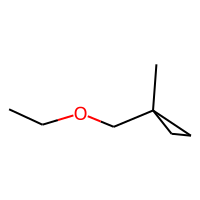
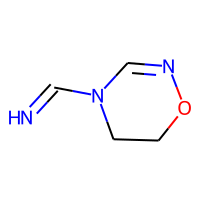
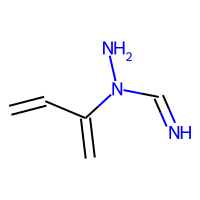
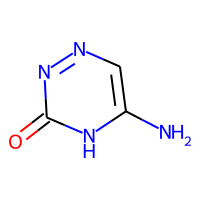
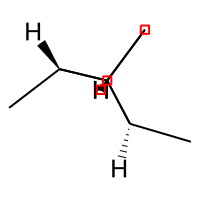

In [6]:
frame.tail()

In [7]:
len(frame)

11

# Reorganizing data per atom

In [10]:
for layer in frame['layer3']:
    print(len(ast.literal_eval(layer)))

SyntaxError: invalid syntax (<unknown>, line 2)

In [8]:
symbols = []
hybridization = []
smiles = []
neighbors = []
for sym, hyb, smi, n  in zip(frame['symbols'], frame['hybridization'], frame['SMILES'], frame['neighbors']):
    symbols.append(ast.literal_eval(sym))
    hybridization.append(ast.literal_eval(hyb))
    smiles.append(smi)
    neighbors.append(ast.literal_eval(n))
    

In [9]:
atomic_energies = {}
for c in range(8):
    atomic_energies[c]=[]

for i, a in enumerate(frame['atomic_energies']):
    for m, ae in enumerate(ast.literal_eval(a)):
        atomic_energies[m].append(ae)

In [10]:
print(len(symbols[0]))
print(len(neighbors[0]))

20
20


In [12]:
SMI_dict={}
for i in range(8):
    SMI_dict[i] = {}
    for sym in symbols:
        for s in sym:
            SMI_dict[i][s] = {}

            
for i in range(8):
    for sym, hyb in zip(symbols, hybridization):
        for s, h in zip(sym, hyb):
            SMI_dict[i][s][h]={'E':[], 'SMILES':[], 'Neighbors':[]}

for i in range(8):
    for sym, hyb , ae, smi, neigh in zip(symbols, hybridization, atomic_energies[i], smiles, neighbors):
        for s, h, e, n in zip(sym, hyb, ae[0], neigh):
            SMI_dict[i][s][h]['E'].append(e)
            SMI_dict[i][s][h]['SMILES'].append(smi)
            SMI_dict[i][s][h]['Neighbors'].append(n)

In [ ]:
SMI_dict['Average'] = {}
for sym in symbols:
    for s in sym:
        SMI_dict['Average'][s] = {}

for sym, hyb, neigh in zip(symbols, hybridization, neighbors):
    for s, h, n in zip(sym, hyb, neigh):
        SMI_dict['Average'][s][h]={'E':[], 'SMILES':[], 'Neighbors':[]}
        
for sym, hyb , ae, smi, neigh in zip(symbols, hybridization, frame['average_atomic_energies'], smiles, neighbors):
    for s, h, e, n in zip(sym, hyb, ae, neigh):
        SMI_dict['Average'][s][h]['E'].append(e)
        SMI_dict['Average'][s][h]['SMILES'].append(smi)
        SMI_dict['Average'][s][h]['Neighbors'].append(n)

# Extract specific atom data

In [ ]:
### Edit
model = 'ANI2xrepulsion'
atomtype = 'C'
dataset = 'ANI1-E'
num_models = 8

In [ ]:
data_atom = atom_df(atomtype)

In [ ]:
data_atom.head()

In [ ]:
len(data_atom)

In [ ]:
data_atom['E'].isna().sum()

In [ ]:
data_atom.to_csv('/data/khuddzu/hybridization/03-2023_hyb_per_model/csv/{}/{}_{}_df_per_atom_{}.csv'.format(dataset, 
                                                                                                            model, 
                                                                                                            atomtype, 
                                                                                                            dataset))